Women Clothing E-commerce

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /home/tumuruu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tumuruu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tumuruu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
df = pd.read_csv('../dataset/Womens Clothing E-Commerce Reviews.csv', engine='python', on_bad_lines='skip')

In [86]:
# check dimensions of the data
df.shape

(23486, 11)

In [87]:
# check first few observations
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [88]:
# Check for the presence of missing values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [89]:
# check the nature of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [90]:
# check the unique categories present in non-numeric columns
df.select_dtypes(exclude='number').nunique()

Title              13993
Review Text        22634
Division Name          3
Department Name        6
Class Name            20
dtype: int64

In [91]:
# Dropping unwanted columns
df.drop(labels=['Unnamed: 0', "Clothing ID", "Title", "Class Name"], axis=1, inplace=True)

In [92]:
# Check missing values in reviews
df[df['Review Text'].isnull()].head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name
92,23,NaN,5,1,0,General Petite,Tops
93,31,NaN,5,1,0,General,Dresses
98,50,NaN,5,1,0,General,Jackets
135,35,NaN,4,1,0,General Petite,Tops
142,35,NaN,5,1,0,General,Jackets


In [93]:
# Dropping columns which don't have any review
df = df[~df['Review Text'].isnull()]

In [94]:
df.shape

(22641, 7)

In [95]:
# Check the distribution of targer column
df['Recommended IND'].value_counts()

Recommended IND
1    18540
0     4101
Name: count, dtype: int64

# 1. Case Conversion

In [96]:
# Create a copy of the original data
df_processed = df.copy()

In [97]:
# Case conversion
df_processed['Review Text'] = df_processed['Review Text'].str.lower()

In [98]:
# Display the modified Dataframe
df_processed.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name
0,33,absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate
1,34,love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses
2,60,i had such high hopes for this dress and reall...,3,0,0,General,Dresses
3,50,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops


# Removing Unwanted Patterns

In [99]:
# Remove unwanted patterns from text using regex
df_processed['Review Text'] = df_processed['Review Text'].replace('[^a-z\s]', '', regex=True)
df_processed['Review Text'] = df_processed['Review Text'].replace('[\s+]', ' ', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15817/1455389200.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_processed['Review Text'] = df_processed['Review Text'].replace('[^a-z\s]', '', regex=True)
/tmp/ipykernel_15817/1455389200.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_processed['Review Text'] = df_processed['Review Text'].replace('[\s+]', ' ', regex=True)


In [100]:
# Display the modified Dataframe
df_processed.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name
0,33,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate
1,34,love this dress its sooo pretty i happened t...,5,1,4,General,Dresses
2,60,i had such high hopes for this dress and reall...,3,0,0,General,Dresses
3,50,i love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops


# 3. Tokenization

In [101]:
# Tokenize the review column
df_processed['Review Text'] = df_processed['Review Text'].apply(lambda x: word_tokenize(str(x)))

In [102]:
# Display the modified Dataframe
df_processed.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name
0,33,"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0,Initmates,Intimate
1,34,"[love, this, dress, its, sooo, pretty, i, happ...",5,1,4,General,Dresses
2,60,"[i, had, such, high, hopes, for, this, dress, ...",3,0,0,General,Dresses
3,50,"[i, love, love, love, this, jumpsuit, its, fun...",5,1,0,General Petite,Bottoms
4,47,"[this, shirt, is, very, flattering, to, all, d...",5,1,6,General,Tops


# StopWord

In [103]:
# Download stopwords from NLTK
stop_words = set(stopwords.words('english'))

In [104]:
# remove stopwords from reviews
df_processed['Review Text'] = df_processed['Review Text'].apply(lambda x:' '.join([word for word in x if word not in stop_words]))

In [105]:
# display the modified Dataframe
df_processed.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name
0,33,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate
1,34,love dress sooo pretty happened find store im ...,5,1,4,General,Dresses
2,60,high hopes dress really wanted work initially ...,3,0,0,General,Dresses
3,50,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms
4,47,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops


# 5. Lemmatization

In [106]:
# Instantiate wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

In [107]:
# Apply lemmatization to reviews
df_processed['Review Text'] = df_processed['Review Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]) )

In [108]:
# choose the feature to compate 
feature_to_compare = 'Review Text'

In [109]:
# Access the specified feature in both DataFrames
original_feature  = df[feature_to_compare]
processed_feature = df_processed[feature_to_compare]

In [110]:
# Create a new Dataframe for comparison
comparison_df = pd.concat([original_feature, processed_feature], axis=1, keys=['Original', 'Processed'])

# Display the comparison DataFrame
comparison_df.sample(5)

,Original,Processed
13411,"Beautiful dress, stretch material makes sure i...",beautiful dress stretch material make sure fit...
13305,Amazing dye so unique\r\nyou can put in washin...,amazing dye unique put washing machine prob ma...
253,I have this dress on today in white and i am c...,dress today white coming back buy second color...
12626,Great buy on sale. i wanted a foundation tee t...,great buy sale wanted foundation tee wear card...
9900,Don't be fooled by the image; unless you have ...,dont fooled image unless cd chest romper mass ...


# Wordcloud

In [111]:
# Separate the Dataframe into two based on the 'recommend' column
df_recommend_0 = df_processed[df_processed['Recommended IND'] == 0]
df_recommend_1 = df_processed[df_processed['Recommended IND'] == 1]

In [112]:
# Generate WordCloud for recommend = 0
text_recommend_0 = ' '.join(df_recommend_0['Review Text'])
wordcloud_text_recommend_0 = WordCloud(width=800, height=400, background_color='white').generate(text_recommend_0)

In [113]:
# Generate WordCloud for recommend = 1
text_recommend_1 = ' '.join(df_recommend_1['Review Text'])
wordcloud_text_recommend_1 = WordCloud(width=800, height=400, background_color='white').generate(text_recommend_1)

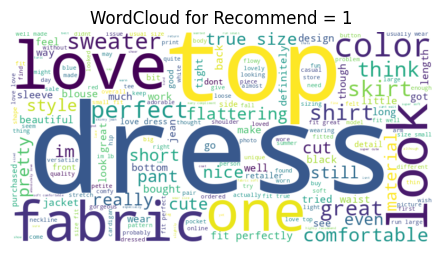

In [114]:
# Display the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_text_recommend_1, interpolation='bilinear')
plt.title("WordCloud for Recommend = 1")
plt.axis('off')
plt.show()

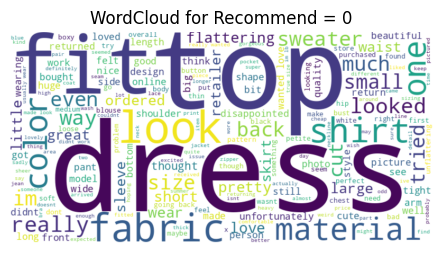

In [115]:
# Display the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_text_recommend_0, interpolation='bilinear')
plt.title("WordCloud for Recommend = 0")
plt.axis('off')
plt.show()

In [116]:
X = df_processed['Review Text']
y = df_processed['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

# Multinominal Naive bayes using Count Vectorizer

In [117]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [118]:
# Instantiate Multinominal Naive Bayes model
mnb = MultinomialNB()

In [121]:
# Train the model
mnb.fit(X_train_vectorized, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [122]:
# Make predictions on train and test
y_pred_train = mnb.predict(X_train_vectorized)
y_pred_test = mnb.predict(X_test_vectorized)

In [123]:
# evaluate the model
classification_report_train = classification_report(y_train, y_pred_train)
classification_report_test = classification_report(y_test, y_pred_test)

In [124]:
# Display the results
print("Classification Report:\n",classification_report_train)
print("Classification Report:\n",classification_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      3315
           1       0.95      0.95      0.95     14797

    accuracy                           0.92     18112
   macro avg       0.86      0.85      0.86     18112
weighted avg       0.92      0.92      0.92     18112

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       786
           1       0.92      0.95      0.94      3743

    accuracy                           0.89      4529
   macro avg       0.82      0.79      0.80      4529
weighted avg       0.89      0.89      0.89      4529

